# Aula 1: Estrutura Básica do LangChain



### **Passo 1. Instalação das Dependências**
   Primeiro, certifique-se de que você tem o LangChain instalado. Você pode instalá-lo usando pip:

In [ ]:
pip install langchain langchain-community python-dotenv openai

### **Passo 2: Configurar a Chave da API**

1. **Obtenha sua chave da API:**

   - **OpenAI**: Acesse o [site da OpenAI](https://platform.openai.com/account/api-keys) e gere sua chave da API. Certifique-se de copiá-la e armazená-la em local seguro, pois você não poderá visualizá-la novamente.
   - **Gemini**: Acesse o [AI Studio da Google](https://aistudio.google.com/app/apikey), faça login com sua conta Google e siga as instruções para gerar a chave de acesso à API Gemini.
   - **DeepSeek**: Vá até o [site oficial da DeepSeek](https://www.deepseek.com/), faça login e gere sua chave da API no painel de configurações.

2. **Armazene sua chave em um arquivo `.env`:**

   Crie ou edite um arquivo chamado `.env` no diretório do seu projeto e adicione as chaves obtidas, seguindo o formato abaixo:

   ```plaintext
   OPENAI_API_KEY=your_openai_api_key_here
   ```

3. **Carregue as chaves no seu código:**

   Use uma biblioteca como `python-dotenv` para carregar as variáveis de ambiente no seu programa:

   ```python
   from dotenv import load_dotenv
   import os

   # Carregar as variáveis do arquivo .env
   load_dotenv()





### **Passo 3: Chamando um LLM com `invoke`**


O método `invoke` é usado para enviar uma entrada ao LLM e receber uma resposta completa.

In [ ]:
from langchain.llms import OpenAI
from dotenv import load_dotenv
import os

# Carregar as variáveis do arquivo .env
load_dotenv()

# Obter as chaves das APIs
openai_api_key = os.getenv("OPENAI_API_KEY")
gemini_api_key = os.getenv("GOOGLE_API_KEY")
deepseek_api_key = os.getenv("DEEPSEEK_API_KEY")

# Certifique-se de que as chaves foram carregadas
if not all([openai_api_key, gemini_api_key, deepseek_api_key]):
    raise ValueError("Uma ou mais chaves de API não foram configuradas corretamente.")

# Inicializando um LLM 
llm = OpenAI(api_key=openai_api_key)

# Chamando o LLM com uma entrada
resposta = llm.invoke("Explique o que é um LLM.")
print(resposta)

### **Passo 3.1: Chamando um LLM com `invoke` com Gemini**


O método `invoke` é usado para enviar uma entrada ao LLM e receber uma resposta completa.

In [ ]:
import os
from langchain_core.messages import HumanMessage

# Set cache to save results to memory
from langchain_google_genai import ChatGoogleGenerativeAI
# Carregar as variáveis do arquivo .env
load_dotenv()

# Obter as chaves das APIs
gemini_api_key = os.getenv("GOOGLE_API_KEY")


# Correctly initialize the ChatGoogleGenerativeAI model
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", google_api_key=gemini_api_key, top_p=0.30)

# Prepare the input messages
input_messages = [
    HumanMessage(content="Quem é o presidente do Brasil?")
]

# Use the model
response = llm.invoke(input_messages)
print(response.content)

### **Passo 3.2: Chamando um LLM com `invoke` com Deepseek**


O método `invoke` é usado para enviar uma entrada ao LLM e receber uma resposta completa.

In [ ]:
import os
from langchain_community.chat_models import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()  # Carrega a chave do .env

# Configuração do DeepSeek
llm = ChatOpenAI(
    openai_api_key=os.getenv("DEEPSEEK_API_KEY"),
    model="deepseek-chat",  # ou "deepseek-reasoner"
    openai_api_base="https://api.deepseek.com/v1",  # Endpoint da API
     
)

# Exemplo de uso
response = llm.invoke("Quem é o presidente do Brasil?")
print(response.content)

### **Passo 3.3: Chamando um LLM com `invoke` com Maritalk**


O método `invoke` é usado para enviar uma entrada ao LLM e receber uma resposta completa.

In [ ]:
from langchain_community.chat_models import ChatMaritalk
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts.chat import ChatPromptTemplate
from dotenv import load_dotenv
import os

load_dotenv()  # Carrega a chave do .env


llm = ChatMaritalk(
    model="sabia-3",  # Available models: sabia-3
    api_key=os.getenv("MARITALK_API_KEY"),  # Insert your API key here
    temperature=0.7,
    max_tokens=100,
)

output_parser = StrOutputParser()

chat_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "você é um assistente especializado em sugestão de nome de pets. Dado animal, você deve sugerir 3 nomes.",
        ),
        ("human", "Eu tenho um {animal}"),
    ]
)

chain = chat_prompt | llm | output_parser

response = chain.invoke({"animal": "cão"})
print(response)  # should answer something like "1. Max\n2. Bella\n3. Charlie\n4. Rocky"

## 4. Stream de Respostas com `stream`

O método `stream` permite receber a resposta do LLM em partes (streaming), útil para respostas longas ou para exibir a resposta em tempo real.

In [ ]:
# Usando stream para receber a resposta em partes
for chunk in llm.stream("Explique a teoria da relatividade."):
    print(chunk, end="", flush=True)

## 5. O que são ChatModels?

ChatModels são modelos de linguagem projetados para interações em formato de chat, onde a conversa é mantida em um contexto de mensagens (histórico).

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage

# Inicializando um ChatModel
chat = ChatOpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Criando uma conversa
mensagens = [
    SystemMessage(content="Você é um assistente útil."),
    HumanMessage(content="Quem descobriu a penicilina?")
]

# Chamando o ChatModel
resposta = chat.invoke(mensagens)
print(resposta.content)

## 6. Exemplo Completo: Integrando LLM e ChatModel

Vamos criar um exemplo completo que usa tanto LLM quanto ChatModel.

In [ ]:
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage

# Inicializando LLM e ChatModel
llm = OpenAI(api_key=openai_api_key)
chat = ChatOpenAI(api_key=openai_api_key)

# Usando LLM com invoke
resposta_llm = llm.invoke("Explique o que é inteligência artificial.")
print("Resposta do LLM:", resposta_llm)

# Usando ChatModel com invoke
mensagens = [
    SystemMessage(content="Você é um assistente especializado em ciência."),
    HumanMessage(content="Quem foi Marie Curie?")
]
resposta_chat = chat.invoke(mensagens)
print("Resposta do ChatModel:", resposta_chat.content)

# Usando stream com LLM
print("Streaming da resposta do LLM:")
for chunk in llm.stream("Descreva o sistema solar."):
    print(chunk, end="", flush=True)

# Aula 2: Trabalhando com Prompts no LangChain

Nesta segunda aula, vamos explorar o uso de **Prompt Templates** no LangChain. Vamos cobrir:

1. **Prompt Templates**: Como criar e usar templates de prompts.
2. **Composing Prompts**: Como combinar múltiplos prompts.
3. **Templates para Chat**: Como criar templates para interações em formato de chat.
4. **Templates de Few-shot para LLMs**: Como usar exemplos para guiar a geração de texto.
5. **Templates de Few-shot para Chat**: Como aplicar few-shot learning em modelos de chat.

## 1. O que são Prompt Templates?

Prompt Templates são modelos pré-definidos que ajudam a estruturar a entrada para um LLM. Eles permitem que você crie prompts dinâmicos, reutilizáveis e adaptáveis.

In [ ]:
from langchain.prompts import PromptTemplate

# Criando um Prompt Template
template = "Explique o conceito de {conceito} em {nivel} palavras."
prompt = PromptTemplate(
    input_variables=["conceito", "nivel"],
    template=template
)

# Preenchendo o template
prompt_formatado = prompt.format(conceito="inteligência artificial", nivel="50")
print(prompt_formatado)

## 2. Composing Prompts

Você pode combinar múltiplos prompts para criar fluxos de trabalho mais complexos. Isso é útil quando você precisa de várias etapas para gerar uma resposta.

In [ ]:
from langchain.prompts import PromptTemplate

# Criando dois prompts
template1 = "Descreva o conceito de {conceito}."
template2 = "Agora, explique como {conceito} é aplicado em {area}."

prompt1 = PromptTemplate(input_variables=["conceito"], template=template1)
prompt2 = PromptTemplate(input_variables=["conceito", "area"], template=template2)

# Combinando os prompts
descricao = prompt1.format(conceito="machine learning")
aplicacao = prompt2.format(conceito="machine learning", area="medicina")

print(descricao)
print(aplicacao)

template_final = (descricao+aplicacao)



In [ ]:
llm.invoke(template_final)


## 3. Templates para Chat

Templates para Chat são usados para criar interações em formato de chat, onde o histórico de mensagens é mantido.

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema import HumanMessage, SystemMessage

# Criando um template para chat
template = ChatPromptTemplate.from_messages([
    SystemMessage(content="Você é um assistente útil."),    
    ("human", "Explique o que é {conceito}.")
])

# Preenchendo o template
template_final = template.format_messages(conceito="blockchain")
print(template_final)


## 4. Templates de Few-shot para LLMs

Few-shot learning envolve fornecer alguns exemplos ao modelo para guiar sua geração de texto.

In [ ]:
from langchain.prompts import FewShotPromptTemplate, PromptTemplate

# Exemplos para few-shot learning
exemplos = [
    {"pergunta": "O que é um átomo?", "resposta": "Um átomo é a unidade básica da matéria."},
    {"pergunta": "O que é uma célula?", "resposta": "Uma célula é a unidade básica da vida."}
]

# Template para cada exemplo
exemplo_template = PromptTemplate(
    input_variables=["pergunta", "resposta"],
    template="Pergunta: {pergunta}\nResposta: {resposta}"
)

# Criando o Few-shot Prompt Template
few_shot_template = FewShotPromptTemplate(
    examples=exemplos,
    example_prompt=exemplo_template,
    prefix="Responda as perguntas seguindo os exemplos:",
    suffix="Pergunta: {pergunta}\nResposta:",
    input_variables=["pergunta"]
)

# Preenchendo o template
prompt = few_shot_template.format(pergunta="O que é um gene?")
print(prompt)



## 5. Templates de Few-shot para Chat

Few-shot learning também pode ser aplicado em modelos de chat, fornecendo exemplos de interações.

In [ ]:
from langchain.prompts import ChatPromptTemplate, FewShotChatMessagePromptTemplate

# Exemplos para few-shot learning
exemplos = [
    {"input": "O que é um átomo?", "output": "Um átomo é a unidade básica da matéria."},
    {"input": "O que é uma célula?", "output": "Uma célula é a unidade básica da vida."}
]

# Template para cada exemplo
exemplo_template = ChatPromptTemplate.from_messages([
    ("human", "{input}"),
    ("ai", "{output}")
])

# Criando o Few-shot Chat Template
few_shot_chat_template = FewShotChatMessagePromptTemplate(
    example_prompt=exemplo_template,
    examples=exemplos
)

# Combinando com um template de chat
final_template = ChatPromptTemplate.from_messages([
    ("system", "Você é um assistente útil."),
    few_shot_chat_template,
    ("human", "{input}")
])

# Preenchendo o template
mensagens = final_template.format_messages(input="O que é um gene?")
print(mensagens)


# Aula 3: Trabalhando com Output Parsers no LangChain
## 1. O que são Output Parsers?

Output Parsers são usados para transformar a saída bruta de um LLM em um formato mais estruturado e útil. Eles são especialmente úteis quando você precisa que a saída do modelo siga um padrão específico, como JSON, listas ou outros formatos.


## 2. Tipos de Output Parsers



### 2.1 `StructuredOutputParser`

O `StructuredOutputParser` é usado para saídas estruturadas, como JSON. Ele permite que você defina um esquema para a saída.

In [ ]:
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.output_parsers import StructuredOutputParser, ResponseSchema

# Definindo o esquema da resposta
response_schemas = [
    ResponseSchema(name="conceito", description="O conceito explicado."),
    ResponseSchema(name="explicacao", description="A explicação do conceito.")
]
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

# Criando um Prompt Template
template = """
Explique o conceito de {conceito} em {nivel} palavras.
{format_instructions}
"""
prompt = PromptTemplate(
    input_variables=["conceito", "nivel"],
    template=template,
    partial_variables={"format_instructions": output_parser.get_format_instructions()}
)

# Inicializando o LLM
llm = OpenAI()

# Criando a cadeia com StructuredOutputParser
chain = LLMChain(llm=llm, prompt=prompt, output_parser=output_parser)

# Executando a cadeia
resposta = chain.run(conceito="inteligência artificial", nivel="50")
print(resposta)

# Aula 4: Trabalhando com SequentialChain no LangChain

## 1. O que é SequentialChain?

SequentialChain é uma cadeia que permite executar uma sequência de operações, onde a saída de uma etapa é passada como entrada para a próxima. Isso é útil quando você precisa realizar várias tarefas em sequência, como gerar texto, processar informações e tomar decisões com base nos resultados.

---
## 2. Como criar uma SequentialChain

### 2.1 Criando chain's



In [ ]:
from langchain.chains import SequentialChain
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Inicializando o LLM
llm = OpenAI()

prompt = PromptTemplate.from_template(
'''Texto de um idioma aleatório: {texto_idioma}.
Retorne texto traduzido em português.'''
)

chain_texto = LLMChain(llm=llm, prompt=prompt, output_key='texto_pt')

prompt_resumo = PromptTemplate.from_template(
'''Dado o texto em português: {texto_pt}.
Faça um resumo de até 50 palavras desse texto.'''
)

chain_resumo = LLMChain(llm=llm, prompt=prompt_resumo, output_key='texto_resumo')

### 2.2 Criando Sequência ou Encadeamento

In [ ]:
chain = SequentialChain(
    chains=[chain_texto, chain_resumo],
    input_variables=['texto_idioma'],
    output_variables=['texto_pt', 'texto_resumo'],
    verbose=True
)
texto = "Le soleil se lève doucement sur la ville, illuminant les rues d'une lumière dorée. Les oiseaux chantent, \
annonçant le début d'une nouvelle journée. Les habitants sortent peu à peu de chez eux, prêts à affronter les défis qui les attendent.\
Dans l'air, on sent une énergie positive, comme si tout était possible. C'est le moment de croire en ses rêves et de saisir les opportunités qui se présentent."

resposta = chain.invoke({'texto_idioma': texto})
resposta

#### Exemplo de Encadeamento Simples usando LLM diferentes:
```python
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain, SequentialChain

# Inicializando os LLMs
llm1 = OpenAI(api_key="sua_chave_api", temperature=0.7)
llm2 = OpenAI(api_key="sua_chave_api", temperature=0.7)

# Criando o primeiro Prompt Template
template1 = "Explique o conceito de {conceito}."
prompt1 = PromptTemplate(
    input_variables=["conceito"],
    template=template1
)

# Criando o segundo Prompt Template
template2 = "Agora, explique como {conceito} é aplicado em {area}."
prompt2 = PromptTemplate(
    input_variables=["conceito", "area"],
    template=template2
)

# Criando as cadeias
chain1 = LLMChain(llm=llm1, prompt=prompt1, output_key="explicacao_conceito")
chain2 = LLMChain(llm=llm2, prompt=prompt2, output_key="aplicacao_conceito")

# Criando a SequentialChain
sequential_chain = SequentialChain(
    chains=[chain1, chain2],
    input_variables=["conceito", "area"],
    output_variables=["explicacao_conceito", "aplicacao_conceito"]
)

# Executando a SequentialChain
resultado = sequential_chain({"conceito": "inteligência artificial", "area": "medicina"})
print("Explicação do conceito:", resultado["explicacao_conceito"])
print("Aplicação do conceito:", resultado["aplicacao_conceito"])

### **Desafio - Chains**
Crie as seguintes chains:

1) Uma chain para pegar um nome completo de uma pessoa e converter em caixa alta
2) Uma chain para criptografar
3) Mostre resultado final

# Aula 5: Trabalhando com Runnables no LangChain

## 1. O que são Runnables?

Runnables são componentes que podem ser encadeados para formar pipelines de processamento. Eles representam operações que consomem uma entrada e produzem uma saída, como:
- Chamadas a LLMs.
- Transformações de dados.
- Combinações de resultados.

## 2. RunnableParallel: Executando Tarefas em Paralelo

O `RunnableParallel` permite executar múltiplos Runnables em paralelo e combinar seus resultados em um único dicionário.

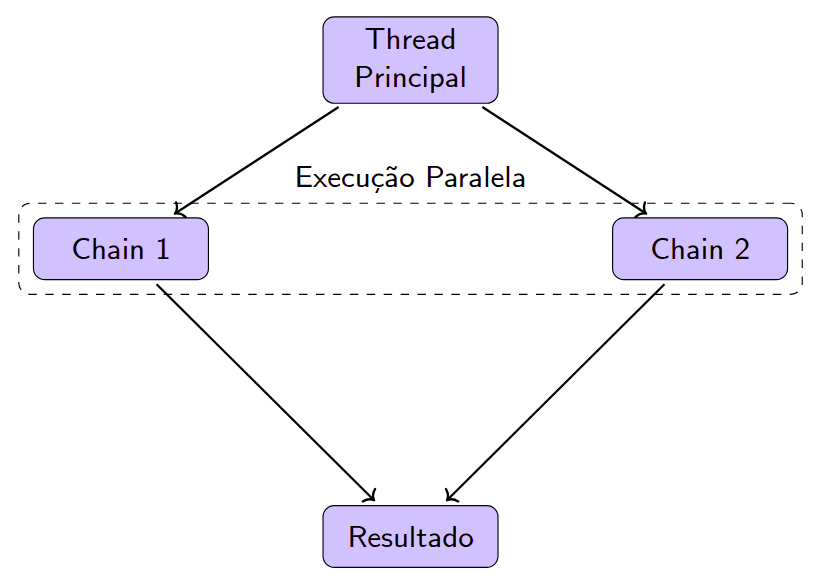

In [ ]:
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.schema.runnable import RunnableParallel

# Inicializando o LLM
llm = OpenAI()

# Criando duas cadeias diferentes
template_potencia = "Quanto é {base} elevado ao quadrado?"
chain_potencia = LLMChain(llm=llm, prompt=PromptTemplate.from_template(template_potencia))

template_raiz = "Quanto é raiz quadrada de {raiz}?"
chain_raiz = LLMChain(llm=llm, prompt=PromptTemplate.from_template(template_raiz))

# Combinando as cadeias em paralelo
parallel_chain = RunnableParallel(
    potencia=chain_potencia,
    raiz=chain_raiz
)

# Executando
resultado = parallel_chain.invoke({"base": "2", "raiz": "4"})
print("potencia:", resultado["potencia"]["text"])
print("raiz:", resultado["raiz"]["text"])

### Utilizar resultado

In [61]:
template_soma = "Dado {num1} e {num2}, qual é a soma?"
prompt_soma = PromptTemplate.from_template(template_soma)

parallel_chain = RunnableParallel(
    num1= chain_potencia,
    num2= chain_raiz
)

In [ ]:
chain_soma = LLMChain(llm=llm, prompt=prompt_soma, output_key="soma")
resultado = chain_soma.invoke(parallel_chain.invoke({"base": "2", "raiz": "4"}))
resultado

In [59]:
from langchain_core.output_parsers import StrOutputParser

# outra forma
chain = parallel_chain | prompt_soma | llm | StrOutputParser()
resultado = chain.invoke({"base": "2", "raiz": "4"})

In [ ]:
print(resultado)

### Faça esse exemplo 

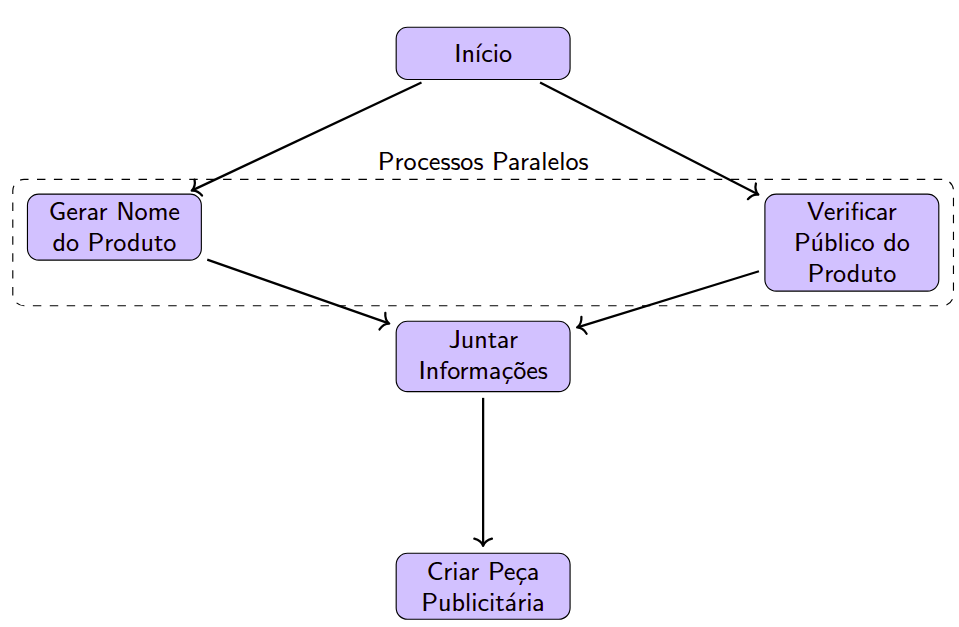

## 3. RunnablePassthrough: Passando Dados Através das Cadeias

O `RunnablePassthrough` é usado para passar dados diretamente para a próxima etapa sem modificação. Pode ser combinado com outros Runnables para enriquecer o contexto.

In [ ]:
from langchain.schema.runnable import RunnablePassthrough
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Inicializando o LLM
llm = OpenAI()

# Criando duas cadeias diferentes
template_poema = "Escreva um poema curto sobre {tema}."
chain_poema = LLMChain(llm=llm, prompt=PromptTemplate.from_template(template_poema))


# Criando uma cadeia que passa o tema e gera um poema
chain = RunnablePassthrough() | {
    "tema": RunnablePassthrough(),
    "poema": chain_poema
}

# Executando
resultado = chain.invoke("o sol")
print("Tema Original:", resultado["tema"])
print("Poema:", resultado["poema"]["text"])

## 4. RunnableLambda: Aplicando Funções Personalizadas

O `RunnableLambda` permite aplicar funções Python personalizadas a entradas ou saídas.

In [ ]:
from langchain.schema.runnable import RunnableLambda
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Inicializando o LLM
llm = OpenAI()

# Criando duas cadeias diferentes
template_poema = "Escreva um poema curto sobre {tema}."
chain_poema = LLMChain(llm=llm, prompt=PromptTemplate.from_template(template_poema),output_key="poema")

# Função para contar palavras
def contar_palavras(texto: str) -> int:
    return len(texto['poema'].split())
# Criando uma cadeia que gera um poema e conta suas palavras
# Criando uma cadeia que gera um poema e conta suas palavras
chain = chain_poema | RunnableLambda(contar_palavras)

# Executando
numero_palavras = chain.invoke({"tema": "a lua"})
print("Número de palavras:", numero_palavras)


# Aula 6: Roteamento no LangChain

## 1. O que é Roteamento?

Roteamento é o processo de direcionar uma entrada para um componente específico (como uma cadeia ou prompt) com base em critérios definidos. É útil para:
- Escolher entre diferentes especialistas/prompts.
- Filtrar entradas para processamento específico.
- Criar sistemas modulares e adaptativos.

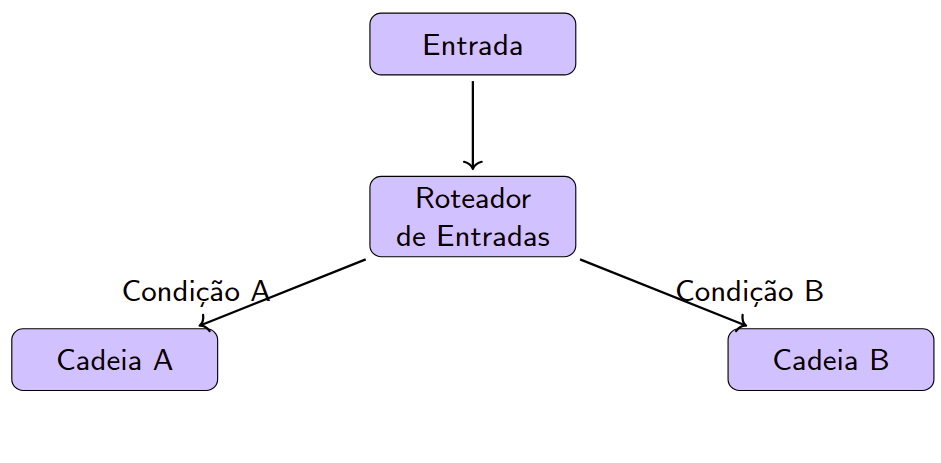

### Passo 1. Criando as Branchs 

In [140]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

model = ChatOpenAI()

prompt = ChatPromptTemplate.from_template('''Você é um professor de matemática de ensino fundamental capaz de dar respostas muito detalhadas e didáticas. Responda a seguinte pergunta de um aluno:
Pergunta: {pergunta}''')
chain_matematica = prompt | model

prompt = ChatPromptTemplate.from_template('''Você é um professor de física de ensino fundamental capaz de dar respostas muito detalhadas e didáticas. Responda a seguinte pergunta de um aluno:
Pergunta: {pergunta}''')
chain_fisica = prompt | model

prompt = ChatPromptTemplate.from_template('''Você é um professor de história de ensino fundamental capaz de dar respostas muito detalhadas e didáticas. Responda a seguinte pergunta de um aluno:
Pergunta: {pergunta}''')
chain_historia = prompt | model

prompt = ChatPromptTemplate.from_template('''Pergunta: {pergunta}''')
chain_generica = prompt | model




### Passo 2. Criando categorizador

In [141]:
from pydantic import BaseModel, Field

class Categorizador(BaseModel):
    """Categoriza as perguntas de alunos do ensino fundamental"""
    area_conhecimento: str = Field(description="A área de conhecimento da pergunta feita pelo aluno. \
Deve ser 'física', 'matemática' ou 'história'. Caso não se encaixe em nenhuma delas, retorne 'outra'")


In [ ]:
prompt = ChatPromptTemplate.from_template('Voce deve categorizar a seguinte pergunta: {pergunta}')

model_estruturado = prompt| model.with_structured_output(Categorizador)
model_estruturado.invoke({'pergunta': 'Quem foi o primeiro presidente do Brasil?'} )

### Passo 3. Estrutura de Roteamento

In [ ]:
from langchain_core.runnables import RunnablePassthrough

chain = RunnablePassthrough() | {
    'pergunta' : RunnablePassthrough(),
    'categoria' : model_estruturado
}

chain.invoke({'pergunta': 'Quando foi a independência dos estados unidos?'})


### Passo 3.1. Roteador

In [147]:
def route(input):
    if input['categoria'].area_conhecimento == 'matemática':
        return chain_matematica
    if input['categoria'].area_conhecimento == 'física':
        return chain_fisica
    if input['categoria'].area_conhecimento == 'história':
        return chain_historia
    return chain_generica


### Passo 4. Executar

In [ ]:
chain = RunnablePassthrough() | {
    'pergunta' : RunnablePassthrough(),
    'categoria' : model_estruturado,
} | RunnableLambda(route)

response = chain.invoke({'pergunta': 'Quando foi a independência dos estados unidos?'})
response.content

In [ ]:
chain = RunnableParallel(
    pergunta= RunnablePassthrough(),
    categoria= model_estruturado,
    
) | route

response = chain.invoke({'pergunta': 'Quando foi a independência dos estados unidos?'})
response
